<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+4" color="orange">TechCraphters Ecommerce Analytics</font></b></p>
    <p><b><font size="+3" color="white">Data Quality Assessment</font></b></p>
    <p><b><font size="+1.5" color="orange">Online Shopping Case Study</font></b></p>
    </div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':14}) #sets global font size
import os
import sys
sys.path.append('../../ML-Case-Studies/online-shopping-ml/src/')
from functions.clean_names import clean_names

#define all the utilities we need by running the pilot script
%cd /Users/meccadon/Documents/Documents/Computational_Science_and_Engineering/Data_Driven_SnE/Data_Science_Projects/Py_Github/ML-Case-Studies/online-shopping-ml
#print("PYTHONPATH:",os.getenv("PYTHONPATH"))
%run ./src/functions/pilot_script.py
pd.set_option('display.max_columns',None)
pd.options.display.max_colwidth=500
pd.options.display.max_rows=100

/Users/meccadon/Documents/Documents/Computational_Science_and_Engineering/Data_Driven_SnE/Data_Science_Projects/Py_Github/ML-Case-Studies/online-shopping-ml
Environment Variables Loaded:
PYTHONPATH: /Users/meccadon/Documents/Documents/Computational_Science_and_Engineering/Data_Driven_SnE/Data_Science_Projects/Py_Github/ML-Case-Studies/online-shopping-ml/src
Environment Variables Loaded:
PYTHONPATH: /Users/meccadon/Documents/Documents/Computational_Science_and_Engineering/Data_Driven_SnE/Data_Science_Projects/Py_Github/ML-Case-Studies/online-shopping-ml/src
Attempting to load data from: /Users/meccadon/Documents/Documents/Computational_Science_and_Engineering/Data_Driven_SnE/Data_Science_Projects/Py_Github/ML-Case-Studies/online-shopping-ml/data/raw/online_shoppers_intention.csv
Data Cleaning started
size of original shopping data (12330, 18)
size of shopping data after dropping missing records (12283, 18)
size of shopping data after dropping extreme values (12282, 18)
size of cleaned s

/Users/meccadon/Documents/Documents/Computational_Science_and_Engineering/Data_Driven_SnE/Data_Science_Projects/Py_Github/ML-Case-Studies/online-shopping-ml/src/functions/feature_engineering.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prepd_and_engineered_shopping['info_explorer'].fillna(0,inplace=True)
/Users/meccadon/Documents/Documents/Computational_Science_and_Engineering/Data_Driven_SnE/Data_Science_Projects/Py_Github/ML-Case-Studies/online-shopping-ml/src/functions/feature_engineering.py:44: FutureWarning: A val

Number of null values after default preprocessing is administrative              0
administrative_duration     0
informational               0
informational_duration      0
product_related             0
product_related_duration    0
bounce_rates                0
exit_rates                  0
page_values                 0
special_day                 0
month                       0
operating_systems           0
browser                     0
region                      0
traffic_type                0
visitor_type                0
weekend                     0
purchase                    0
month_numeric               0
channels                    0
session_duration            0
info_explorer               0
product_explorer            0
interaction_strength        0
interaction_depth           0
adjusted_bounce_rate        0
combined_dropoff            0
dtype: int64
Applying Encoding to training set
Number of null values after default preprocessing is administrative             0
administ

In [2]:
#Look at all variables defined in our workspace
%who

clean_names	 clean_prepd_shopping	 cleaned_shopping	 cleaner	 feature_engineering	 go	 load_raw_data	 matplotlib_inline	 np	 
os	 pd	 plt	 prepd_engineered_shopping	 preprocessor	 px	 save_data	 sb	 shopping_test_noencoding	 
shopping_test_preprocessed_encoded	 shopping_train_noencoding	 shopping_train_preprocessed_encoded	 shopping_train_preprocessed_noencoder	 shopping_val_noencoding	 shopping_val_preprocessed_encoded	 shoppingdata	 sys	 


<div class="alert alert-block" style = "background-color: black">
    <p><b><font size="+3" color="orange">1. Statistical Validation</font></b></p>
     <p><b><font size="+1" color="white">The raw, cleaned, preprocessed and feature engineered versions of the data would be used for the quality assessment to highlight the work that was done.</font></b></p>
    </div>

#### __Datasets required__
- raw data - 'shoppingdata'
- cleaned data - 'cleaned_shopping'
- preprocessed data - 'clean_prepd_shopping'
- cleaned,preprocessed and feature_engineered data - 'prepd_engineered_shopping'

<div class="alert alert-block" style = "background-color: orange">
    <p><b><font size="+2" color="black">Data Quality Assessment of Raw & Cleaned Data</font></b></p>
    </div>

In [3]:
raw_data = clean_names(shoppingdata) #standardize the names of columns to lowercase snake letters
raw = shoppingdata.shape
cleaned_data = cleaned_shopping.copy()
clean_shape = cleaned_shopping.shape

#### __Descriptive Stats__

In [4]:
raw_stats = shoppingdata.select_dtypes(include=['float64']).describe()
raw_stats

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [5]:
cleaned_stats = cleaned_shopping.select_dtypes(include=['float64']).describe()
cleaned_stats

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2.345993,81.633762,0.509741,34.727850,32.108426,1205.626952,0.020011,0.041098,5.969137,0.062014
std,3.333274,175.160624,1.276353,139.796775,44.473483,1835.371213,0.044579,0.045632,18.681191,0.199822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,196.500000,0.000000,0.014176,0.000000,0.000000
50%,1.000000,10.000000,0.000000,0.000000,18.000000,612.750000,0.002874,0.025000,0.000000,0.000000
75%,4.000000,95.000000,0.000000,0.000000,38.000000,1481.783333,0.016327,0.048125,0.000000,0.000000
max,27.000000,2720.500000,24.000000,2256.916667,705.000000,43171.233380,0.200000,0.200000,361.763742,1.000000


#### __Invalid data__

In [6]:
raw_data.select_dtypes(include='float64').apply(lambda x:x<0).sum()

administrative               0
administrative_duration     33
informational                0
informational_duration      33
product_related              0
product_related_duration    33
bounce_rates                 0
exit_rates                   0
page_values                  0
special_day                  0
dtype: int64

In [7]:
cleaned_data.select_dtypes(include='float64').apply(lambda x:x<0).sum()

administrative              0
administrative_duration     0
informational               0
informational_duration      0
product_related             0
product_related_duration    0
bounce_rates                0
exit_rates                  0
page_values                 0
special_day                 0
dtype: int64

#### __Missing values__


In [8]:
raw_miss = shoppingdata.apply(lambda x: x.isna().sum())
clean_miss = cleaned_shopping.apply(lambda x: x.isna().sum())

#### __Duplicates__

In [9]:
raw_dup = shoppingdata.duplicated().sum()
clean_dup = cleaned_shopping.duplicated().sum()

#### __Data Type Corrections__

In [10]:
raw_data_types = raw_data.dtypes
cleaned_data_types = cleaned_data.dtypes
for col in raw_data.columns:
    if col in cleaned_data.columns:
        if raw_data[col].dtype == cleaned_data[col].dtype:
            print(f'match: {col}')
        else:
            print(f'mismatch {col} (raw:{raw_data[col].dtype}, cleaned:{cleaned_data[col].dtype})')
    else:
        print(f'column {col} not found in cleaned data')


match: administrative
match: administrative_duration
match: informational
match: informational_duration
match: product_related
match: product_related_duration
match: bounce_rates
match: exit_rates
match: page_values
match: special_day
match: month
match: operating_systems
match: browser
match: region
match: traffic_type
match: visitor_type
match: weekend
column revenue not found in cleaned data


#### __Compute Memory Usage__

In [11]:
raw_mem = shoppingdata.memory_usage(deep=True).sum()/ (1024 ** 2)
clean_mem = cleaned_shopping.memory_usage(deep=True).sum()/ (1024 ** 2)

#### __Outliers__

/var/folders/x1/187w88dx79g287t_9gxll2c40000gn/T/ipykernel_83316/2922653987.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(['0','10k','20k','30k','40k','50k','60k'],fontsize=10)
/var/folders/x1/187w88dx79g287t_9gxll2c40000gn/T/ipykernel_83316/2922653987.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(['0','10k','20k','30k','40k','50k','60k'],fontsize=10)


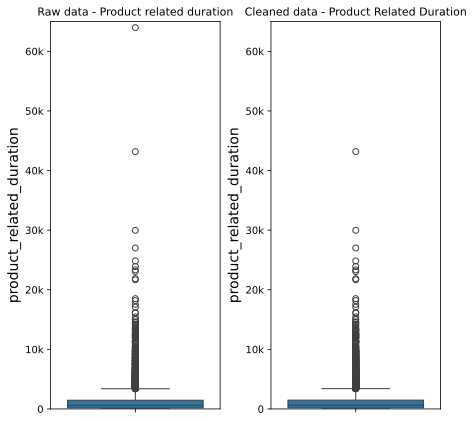

In [12]:
fig, axes = plt.subplots(1,2,figsize=(7,7),gridspec_kw={'wspace':0.3})
ymin=0; ymax=65000
sb.boxplot(data=raw_data, y='product_related_duration', ax=axes[0])
axes[0].set_title('Raw data - Product related duration',fontsize=11)
axes[0].set_ylim(ymin,ymax)
axes[0].set_yticklabels(['0','10k','20k','30k','40k','50k','60k'],fontsize=10)

sb.boxplot(data=cleaned_data, y='product_related_duration', ax=axes[1])
axes[1].set_title('Cleaned data - Product Related Duration',fontsize=11)
axes[1].set_ylim(ymin,ymax)
axes[1].set_yticklabels(['0','10k','20k','30k','40k','50k','60k'],fontsize=10)
plt.show()

#### __Visualization of Data Distributions for Raw and Cleaned data__

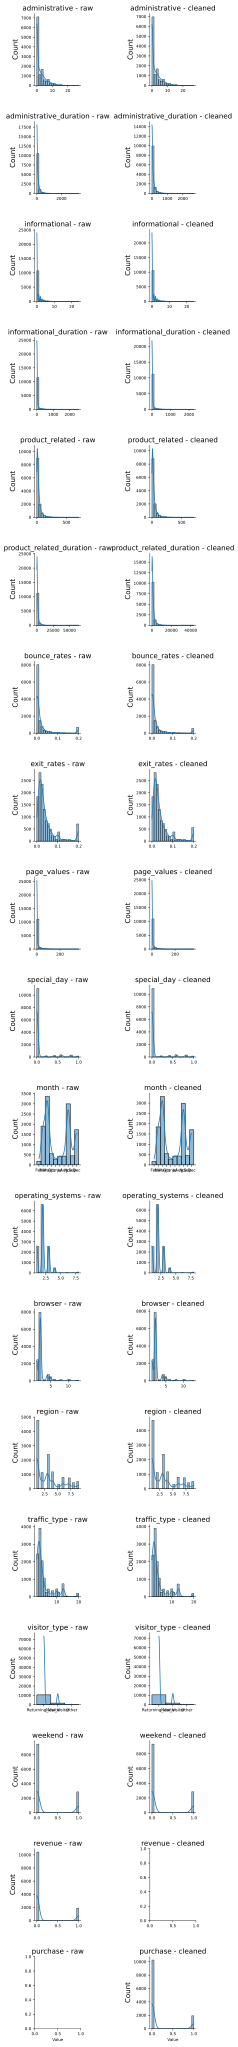

In [13]:
#Combine raw and cleaned data for comparison
raw_data['status'] = 'raw'
cleaned_data['status'] = 'cleaned'

#Concatenate the two datasets for comparison
combined_data = pd.concat([raw_data,cleaned_data])

#Melt the combine data for plotting to split it into values and variables
melted_data = combined_data.melt(id_vars=['status'], var_name='variable',value_name='value')
g= sb.FacetGrid(melted_data, col='status',row='variable',sharex=False,sharey=False, dropna=True)
g.map(sb.histplot,'value',kde=True, bins=20)
g.figure.subplots_adjust(hspace=0.5, wspace=1.5)
g.set_titles("{row_name} - {col_name}",fontsize=8)
g.set_axis_labels("Value", fontsize=8)
for ax in g.axes.flatten():
    ax.tick_params(labelsize=8)
plt.show()

#### __Changes in Raw and Cleaned Numerical Data Distribution__

In [14]:
raw_clean_diff = raw_stats - cleaned_stats
remarks={'administrative':'stats reduced due to missing & duplicate entries',
         'administrative_duration':'stats reduced due to missing & duplicate entries',
         'informational':'stats reduced due to missing & duplicate entries',
         'informational_duration':'stats reduced due to missing & duplicate entries',
         'product_related':'stats reduced due to missing & duplicate entries',
         'product_related_duration':'stats reduced due to missing & duplicate entries',
         'bounce_rates':'stats reduced due to missing & duplicate entries',
         'exit_rates':'stats reduced due to missing & duplicate entries',
         'page_values':'stats remain unchanged',
         'special_day':'stats remain unchanged'}
remarks_df = pd.DataFrame(remarks,index=['remarks'])
raw_clean_data_diff = pd.concat([raw_clean_diff,remarks_df])
raw_clean_data_diff

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day
count,151.0,151.0,151.0,151.0,151.0,151.0,151.0,151.0,165.0,165.0
mean,-0.028195,-0.727586,-0.005762,-0.221462,-0.344541,-9.589895,0.002142,0.001904,-0.079879,-0.000587
std,-0.01052,1.699808,-0.005652,1.028704,0.016857,79.001298,0.003848,0.002896,-0.112754,-0.000905
min,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,-1.0,-11.5,0.0,0.00011,0.0,0.0
50%,0.0,-2.0,0.0,0.0,0.0,-12.98381,0.000246,0.000124,0.0,0.0
75%,0.0,-1.5,0.0,0.0,0.0,-15.303431,0.000357,0.001875,0.0,0.0
max,0.0,678.25,0.0,292.458333,0.0,20802.28885,0.0,0.0,0.0,0.0
remarks,stats reduced due to missing & duplicate entries,stats reduced due to missing & duplicate entries,stats reduced due to missing & duplicate entries,stats reduced due to missing & duplicate entries,stats reduced due to missing & duplicate entries,stats reduced due to missing & duplicate entries,stats reduced due to missing & duplicate entries,stats reduced due to missing & duplicate entries,stats remain unchanged,stats remain unchanged


#### __Table Overview Comparison__

In [15]:
comparison_table = pd.DataFrame({'Metric':['Rows','Columns','Invalid Values','Missing Values (count)','Missing Categoricals','Regroupings','Duplicates','Outliers Removed','Data type Corrections','Memory Usage (mb)'],
                                 'Raw Data':[raw[0],raw[1],33,raw_miss.values[0],'Jan & Apr in Months','20 channels in traffic_type', raw_dup,0,'revenue not in cleaned data-renamed',raw_mem],
                                 'Cleaned Data': [clean_shape[0],clean_shape[1],0,clean_miss.values[0],'Jan & Apr in Months','None',clean_dup,1,'revenue renamed to purchase',clean_mem]})
comparison_table

,Metric,Raw Data,Cleaned Data
0,Rows,12330,12165
1,Columns,18,18
2,Invalid Values,33,0
3,Missing Values (count),14,0
4,Missing Categoricals,Jan & Apr in Months,Jan & Apr in Months
5,Regroupings,20 channels in traffic_type,None
6,Duplicates,119,0
7,Outliers Removed,0,1
8,Data type Corrections,revenue not in cleaned data-renamed,revenue renamed to purchase
9,Memory Usage (mb),2.717777,2.774005


<div class="alert alert-block" style = "background-color: orange">
    <p><b><font size="+2" color="black">Data Quality Assessment of Cleaned & Preprocessed Data</font></b></p>
    </div>

In [19]:
prep_data_noencoding = clean_prepd_shopping.copy()
prep_shape= prep_data_noencoding.shape
prep_miss = prep_data_noencoding.isna().sum()
prep_dup = prep_data_noencoding.duplicated().sum()
prep_mem = prep_data_noencoding.memory_usage(deep=True).sum()/ (1024 ** 2)
Preprocessing_Summary = pd.DataFrame({'Metric':['Rows','Columns','Invalid Values','Missing Values (count)','Missing Categoricals','Regroupings','Duplicates','Outliers Removed','Data type Corrections','New columns created','Memory Usage (mb)'],
                                 'Cleaned Data': [clean_shape[0],clean_shape[1],0,clean_miss.values[0],'Jan & Apr in Months','None',clean_dup,1,'weekend_to_numeric \n', 'month_to_categorical','channels,month_to_numeric',clean_mem],
                                 'Preprocessed Data':[prep_shape[0],prep_shape[1],0,prep_miss.values[0],'Jan & Apr in Months','12 channels in traffic_type',prep_dup,0,'traffic_type renamed to channels','channels,month_to_numeric',prep_mem]})
Preprocessing_Summary

,Metric,Cleaned Data,Preprocessed Data
0,Rows,12165,12165
1,Columns,18,20
2,Invalid Values,0,0
3,Missing Values (count),0,0
4,Missing Categoricals,Jan & Apr in Months,Jan & Apr in Months
5,Regroupings,None,12 channels in traffic_type
6,Duplicates,0,2
7,Outliers Removed,1,0
8,Data type Corrections,traffic_type unchanged,traffic_type renamed to channels
9,New columns created,"channels,month_to_numeric","channels,month_to_numeric"


Assess Categorical variables

In [17]:
for col in shoppingdata.select_dtypes(include=['object','int64','bool']):
    print(shoppingdata[col].value_counts())


month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64
operating_systems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64
browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64
region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64
traffic_type
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64
visitor_type
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64
weekend
False    9462
True     2868

In [18]:
prep_dup = prep_data_noencoding.duplicated(keep='first')
prep_data_noencoding[prep_dup]

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,purchase,month_numeric,channels
11125,0.0,0.0,0.0,0.0,0.693147,0.0,0.2,0.2,0.0,0.0,Dec,3,2,1,1,0,0,False,12,CH_1
11300,0.0,0.0,0.0,0.0,0.693147,0.0,0.2,0.2,0.0,0.0,Dec,8,13,9,20,0,0,False,12,CH_20
